## Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
sns.set()

from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')
import pickle

In [2]:
df_segmentation=pd.read_csv('segmentation data.csv',index_col=0)

In [3]:
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [4]:
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


### Correlation Estimate

In [5]:
df_segmentation.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


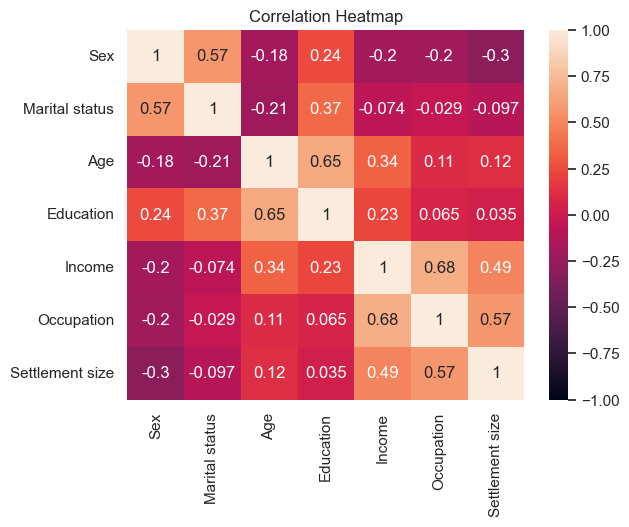

In [6]:
sns.heatmap(df_segmentation.corr(),annot=True,vmin=-1,vmax=1)
plt.title('Correlation Heatmap')
plt.show()

### Visualize Raw Data

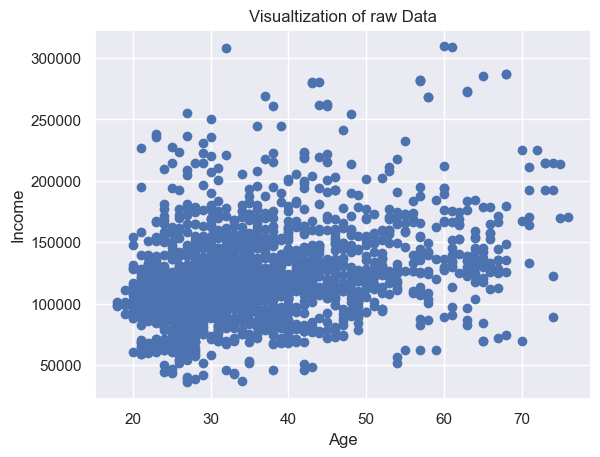

In [7]:
plt.scatter(df_segmentation['Age'],df_segmentation['Income'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualtization of raw Data')
plt.show()

### Standization

In [8]:
scaler=StandardScaler()

In [9]:
segmentation_std=scaler.fit_transform(df_segmentation)

### Hierarchy Clustering

In [10]:
hier_clust=linkage(segmentation_std,method='ward')

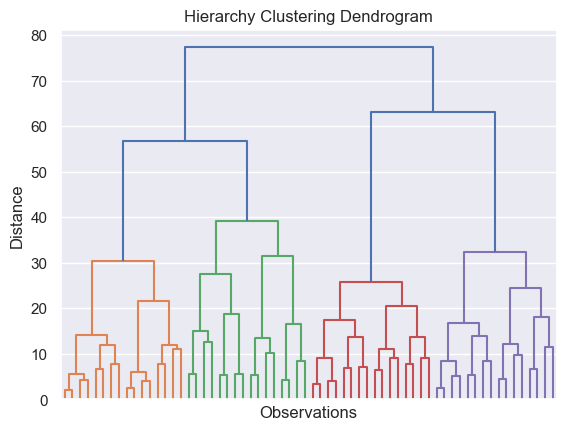

In [11]:
plt.xlabel('Observations')
plt.ylabel('Distance')
plt.title('Hierarchy Clustering Dendrogram')
dendrogram(hier_clust,show_leaf_counts=False,truncate_mode='level',p=5,no_labels=True)
plt.show()

### KMean Clustering

In [12]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

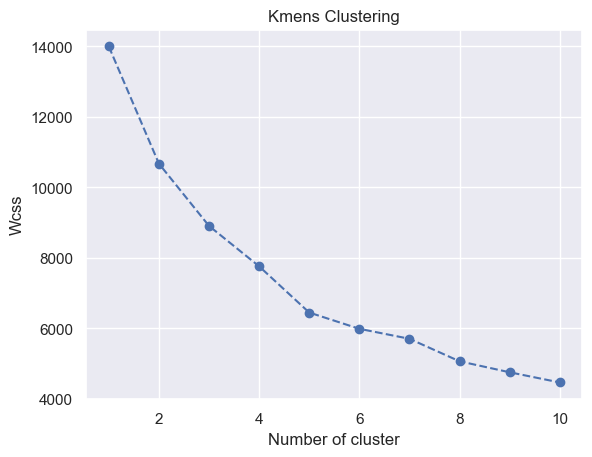

In [13]:
plt.plot(range(1,11),wcss,marker='o',linestyle='--')
plt.xlabel('Number of cluster')
plt.ylabel('Wcss')
plt.title('Kmens Clustering')
plt.show()

In [14]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)

In [15]:
kmeans.fit(segmentation_std)

KMeans(n_clusters=4, random_state=42)

### Result

In [16]:
df_segm_kmeans=df_segmentation.copy()
df_segm_kmeans['Segment K-means']=kmeans.labels_

In [17]:
df_segm_analysis=df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.066543,0.000000,33.240296,0.489834,109932.785582,0.639556,0.611830
1,0.868254,0.785714,32.928571,1.163492,98466.955556,0.384127,0.006349
2,0.691099,0.979058,29.060209,1.104712,126838.926702,1.107330,1.324607
3,0.149888,0.277405,49.192394,1.467562,160958.722595,1.364653,1.425056


In [18]:
df_segm_analysis['N Obs']=df_segm_kmeans[['Segment K-means','Sex']].groupby(['Segment K-means']).count()

In [19]:
df_segm_analysis['Prob Obs']=df_segm_analysis['N Obs']/df_segm_analysis['N Obs'].sum()

In [20]:
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prob Obs
Segment K-means,,,,,,,,,
0,0.066543,0.000000,33.240296,0.489834,109932.785582,0.639556,0.611830,541,0.2705
1,0.868254,0.785714,32.928571,1.163492,98466.955556,0.384127,0.006349,630,0.3150
2,0.691099,0.979058,29.060209,1.104712,126838.926702,1.107330,1.324607,382,0.1910
3,0.149888,0.277405,49.192394,1.467562,160958.722595,1.364653,1.425056,447,0.2235


In [21]:
df_segm_analysis.rename({0:'standard',1:'career focused',\
                         2:'fever-opportunities',3:'well-off'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prob Obs
Segment K-means,,,,,,,,,
standard,0.066543,0.000000,33.240296,0.489834,109932.785582,0.639556,0.611830,541,0.2705
career focused,0.868254,0.785714,32.928571,1.163492,98466.955556,0.384127,0.006349,630,0.3150
fever-opportunities,0.691099,0.979058,29.060209,1.104712,126838.926702,1.107330,1.324607,382,0.1910
well-off,0.149888,0.277405,49.192394,1.467562,160958.722595,1.364653,1.425056,447,0.2235


In [22]:
df_segm_kmeans['Labels']=df_segm_kmeans['Segment K-means'].map\
({0:'standard',1:'career focused',2:'fever-opportunities',3:'well-off'})

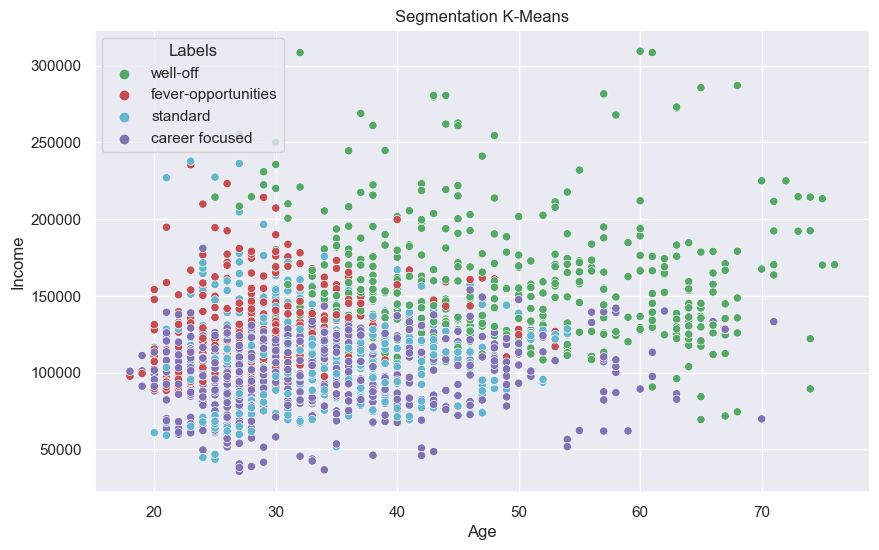

In [23]:
plt.figure(figsize=(10,6))
x_axis=df_segm_kmeans['Age']
y_axis=df_segm_kmeans['Income']
sns.scatterplot(x=x_axis,y=y_axis,hue=df_segm_kmeans['Labels'],\
                palette=['g','r','c','m'])
plt.title('Segmentation K-Means')
plt.show()

### PCA

In [24]:
pca=PCA()

In [25]:
pca.fit(segmentation_std)

PCA()

In [26]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

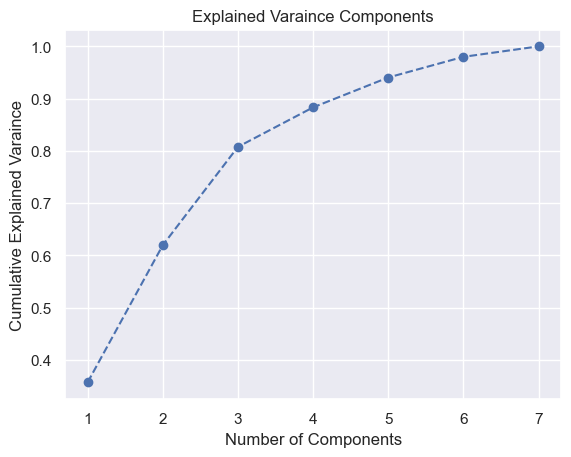

In [27]:
plt.plot(range(1,8),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Varaince')
plt.title('Explained Varaince Components')
plt.show()

In [28]:
pca=PCA(n_components=3)

In [29]:
pca.fit(segmentation_std)

PCA(n_components=3)

### PCA Result

In [30]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [31]:
df_pca_comp=pd.DataFrame(data=pca.components_,\
                        columns=df_segmentation.columns.values,\
                        index=['Component 1','Component 2','Component 3'])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


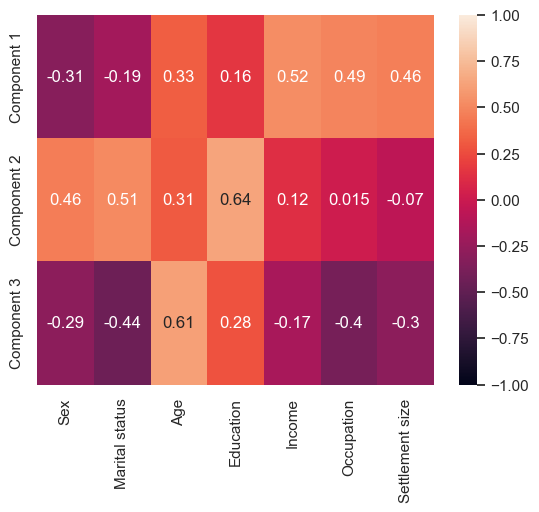

In [32]:
sns.heatmap(df_pca_comp,annot=True,vmin=-1,vmax=1)
plt.show()

In [33]:
pca.transform(segmentation_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [34]:
scores_pca=pca.transform(segmentation_std)

### K-Means Clustering with PCA

In [35]:
wcss=[]
for i in range(1,11):
    kmeans_pca=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

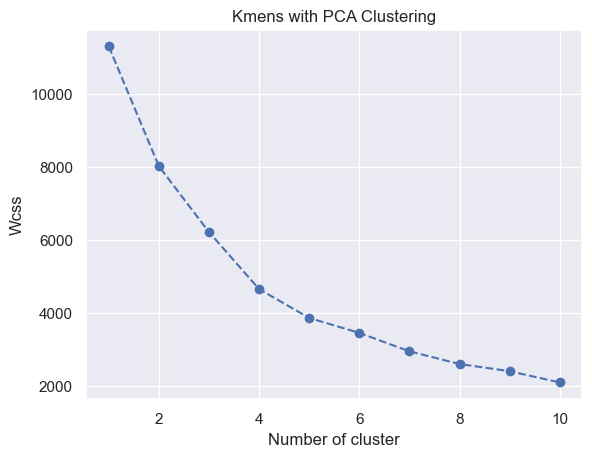

In [36]:
plt.plot(range(1,11),wcss,marker='o',linestyle='--')
plt.xlabel('Number of cluster')
plt.ylabel('Wcss')
plt.title('Kmens with PCA Clustering')
plt.show()

In [37]:
kmeans_pca=KMeans(n_clusters=4,init='k-means++',random_state=42)

In [38]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

### K-Means with PCA Result

In [39]:
df_segm_pca_kmeans=pd.concat([df_segmentation.reset_index(drop=True),\
                             pd.DataFrame(scores_pca)],axis=1)
df_segm_pca_kmeans.columns.values[-3:]=['Component 1','Component 2','Component 3']
df_segm_pca_kmeans['Segment K-means PCA']=kmeans_pca.labels_

In [40]:
df_segm_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,2
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,1
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,0
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,1
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,2
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,1
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,1


In [42]:
df_segm_pca_kmeans_freq=df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,,,,
0,0.001661,0.041528,36.674419,0.684385,138482.186047,1.200997,1.255814,1.228891,-1.220013,0.041063
1,0.627869,0.454098,33.473770,0.944262,88824.154098,0.078689,0.009836,-1.607567,-0.110732,0.625678
2,0.762357,0.973384,27.889734,1.007605,119503.418251,1.055133,0.813688,-0.395592,0.518043,-1.204763
3,0.492366,0.683206,55.919847,2.129771,158400.877863,1.125954,1.099237,1.713376,2.021006,0.867641


In [43]:
df_segm_pca_kmeans_freq['N Obs']=df_segm_pca_kmeans[['Segment K-means PCA','Sex']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs']=df_segm_pca_kmeans_freq['N Obs']/df_segm_pca_kmeans_freq['N Obs'].sum()
df_segm_pca_kmeans_freq.rename({0:'standard',1:'career focused',\
                         2:'well-off',3:'fever-opportunities'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,
standard,0.001661,0.041528,36.674419,0.684385,138482.186047,1.200997,1.255814,1.228891,-1.220013,0.041063,602,0.301
career focused,0.627869,0.454098,33.473770,0.944262,88824.154098,0.078689,0.009836,-1.607567,-0.110732,0.625678,610,0.305
well-off,0.762357,0.973384,27.889734,1.007605,119503.418251,1.055133,0.813688,-0.395592,0.518043,-1.204763,526,0.263
fever-opportunities,0.492366,0.683206,55.919847,2.129771,158400.877863,1.125954,1.099237,1.713376,2.021006,0.867641,262,0.131


In [44]:
df_segm_pca_kmeans['Legend']=df_segm_pca_kmeans['Segment K-means PCA']\
.map({0:'standard',1:'career focused',2:'well-off',3:'fever-opportunities'})

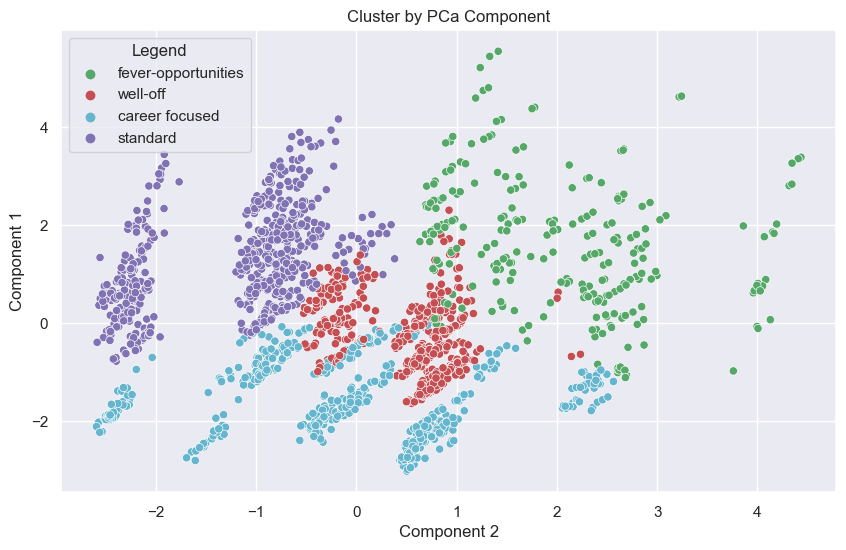

In [45]:
plt.figure(figsize=(10,6))
x_axis=df_segm_pca_kmeans['Component 2']
y_axis=df_segm_pca_kmeans['Component 1']
sns.scatterplot(x=x_axis,y=y_axis,hue=df_segm_pca_kmeans['Legend'],\
                palette=['g','r','c','m'])
plt.title('Cluster by PCa Component')
plt.show()

### Data Export

In [46]:
pickle.dump(scaler,open('scaler.pickle','wb'))

In [47]:
pickle.dump(pca,open('pca.pickle','wb'))

In [48]:
pickle.dump(kmeans_pca,open('kmeans_pca.pickle','wb'))